### IMPORTING LIBRARIES


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
%matplotlib inline


### DATA PRE-PROCESSING


In [3]:
# importing the data set
df= pd.read_csv(r"C:\Users\user\Desktop\Telco customer churn data.csv")

In [4]:
#Checking for the first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking for the number of columns and rows in the data frame

print(df.shape[0])
print(df.shape[1])

7043
21


In [6]:
#checking for duplicates
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


+ The output above shows that the average monthly charges is 64 in USD
+ The output also shows that 25% of the customers pay monthly charges of $89 and less than 25% of customers have  55 or more  as the number of months (tenure) at telco 

#Final thought;
 
+ small proportion of customers have a tenure of 55 months or more, while a larger proportion of customers have a tenure of less than 55 months.


In [7]:
# checking for null Value
null_values = df.isnull()
print(null_values.sum())
    

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
#Checking for datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Checking for  duplicated rows
 
duplicates_mask = df.duplicated()
num_duplicates = duplicates_mask.sum()

print(num_duplicates)



0


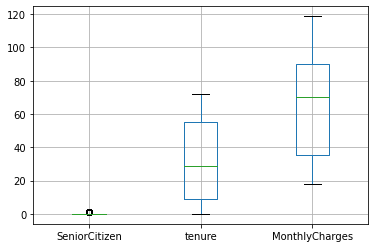

In [10]:
df.boxplot()
plt.show()

In [ ]:
# There is no outliers as indicated by the plot above

In [19]:
# Notice that the Total_Charges column is not included in the boxplot above.

# Converting the column to numeric data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')


### EXPLORATORY ANALYSIS 

1 General Percentage of churn per categories 

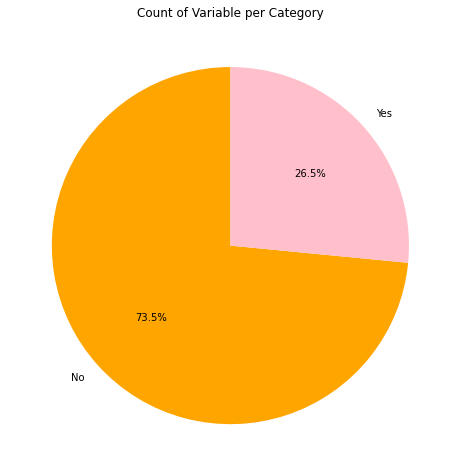

In [20]:


# Count the values of the Churn variable
churn = df['Churn'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 9))
plt.pie(churn,autopct='%1.1f%%',startangle = 90, labels=churn.index, colors=['orange', 'pink'])

# Add labels and title

plt.title('Count of Variable per Category')

# Show the plot
plt.show()


+ The number of churned customers are less compare with the customers that are available. We could say that the telco industry has more retened /active customers base on this plot but this is a one sided conclusion.
+  The ratio of the churned to non churned customers is imbalance with the value as 27%:73% respectively
+ So we go ahead to analyse the data base on other categories or features  to get more insight

2. Divide customers into bins on tenure 

In [21]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['1-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
print(df['tenure_group'].value_counts())

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64


In [22]:
# Created a copy of the dataset to check for duplicates
# just to make sure that any permanent changes made dosen't affect the original data
data = df.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


3. Delete the columns not important for  processing

In [23]:
# Drop column customerID and tenure bracuse we have created the bins so its important to drop the two colume


data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


4. Create a bar chart for each category showing churn rate

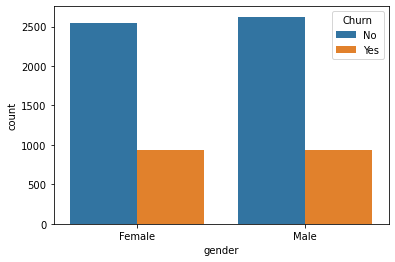

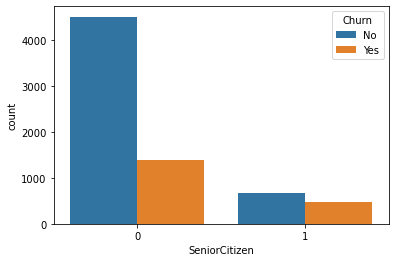

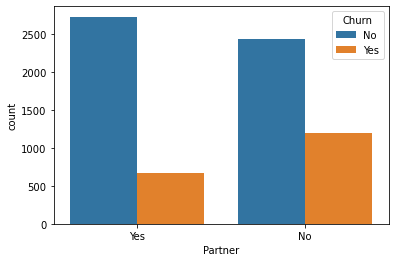

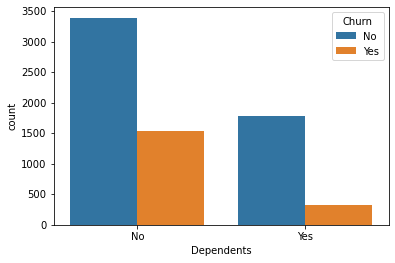

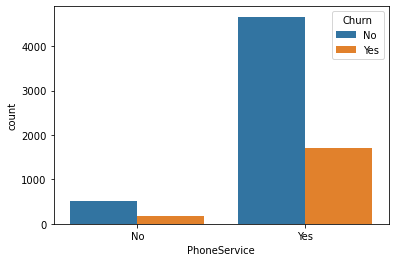

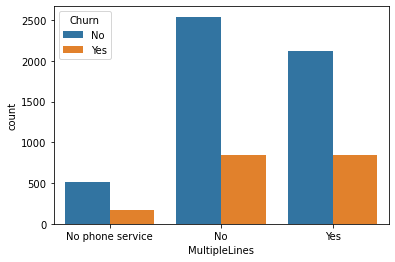

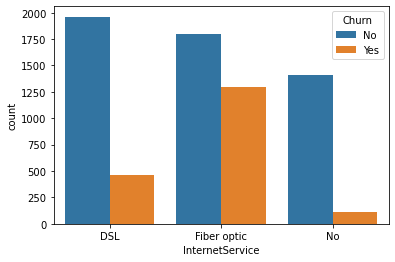

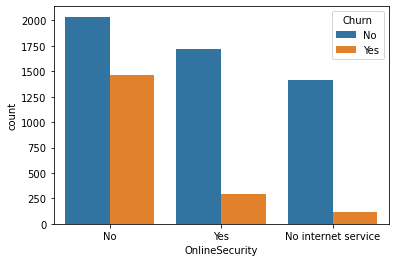

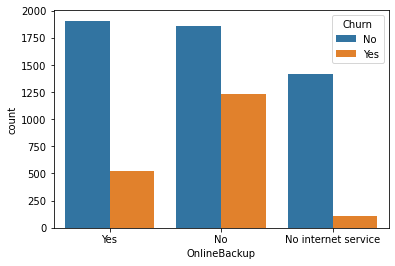

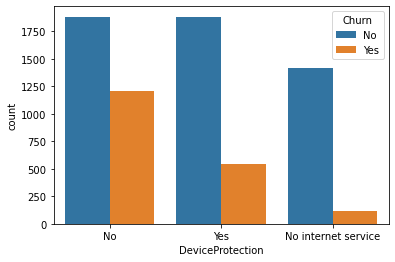

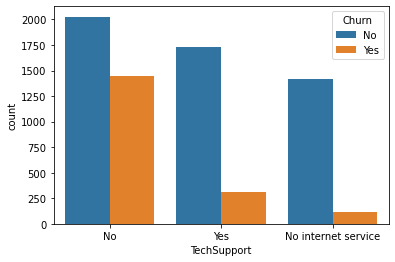

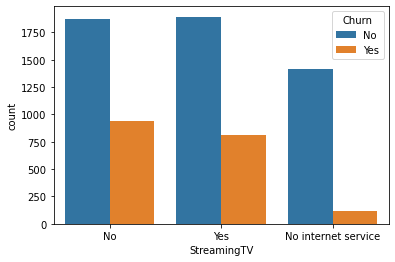

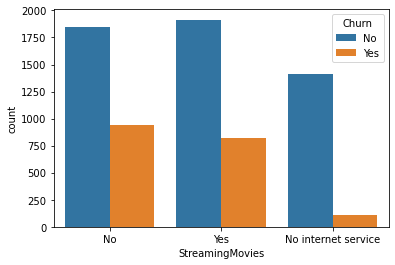

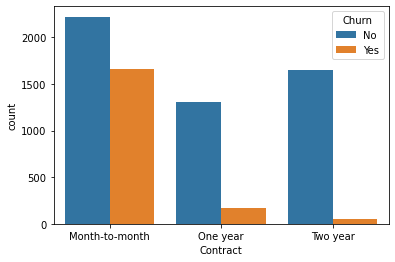

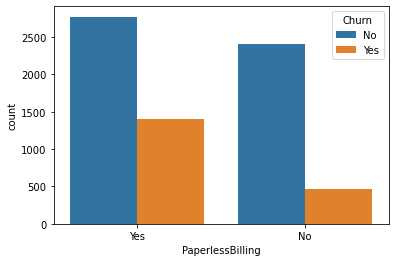

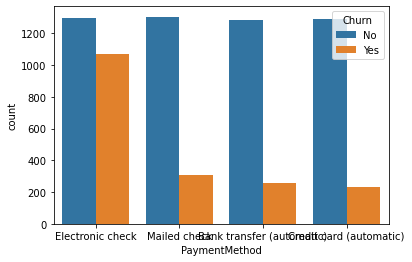

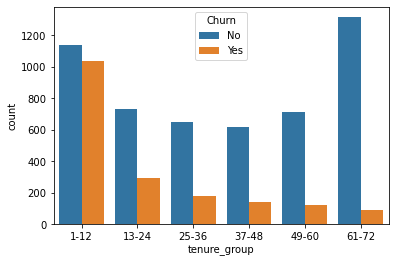

In [53]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

4. Convert the churn column to binary numeric variable.

In [24]:
data["Churn"] = np.where(data.Churn== 'Yes', 1, 0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


5. Convert all the categorical variables into dummy variables

In [25]:
# The purpose is to effectively use regression analysis on the data

data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Monthly charges by churn')

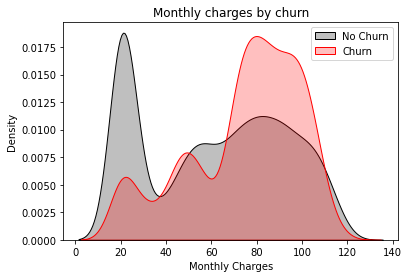

In [26]:
# Checking for the monthly charges effect on the rate of churning

Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="black", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="red", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

+ This is my first  attempt using Kernel density estimate and the plot is quite informative.
+ Increase in the monthlyCharges also leads to increase in the number of customers chuning as expected


<AxesSubplot:>

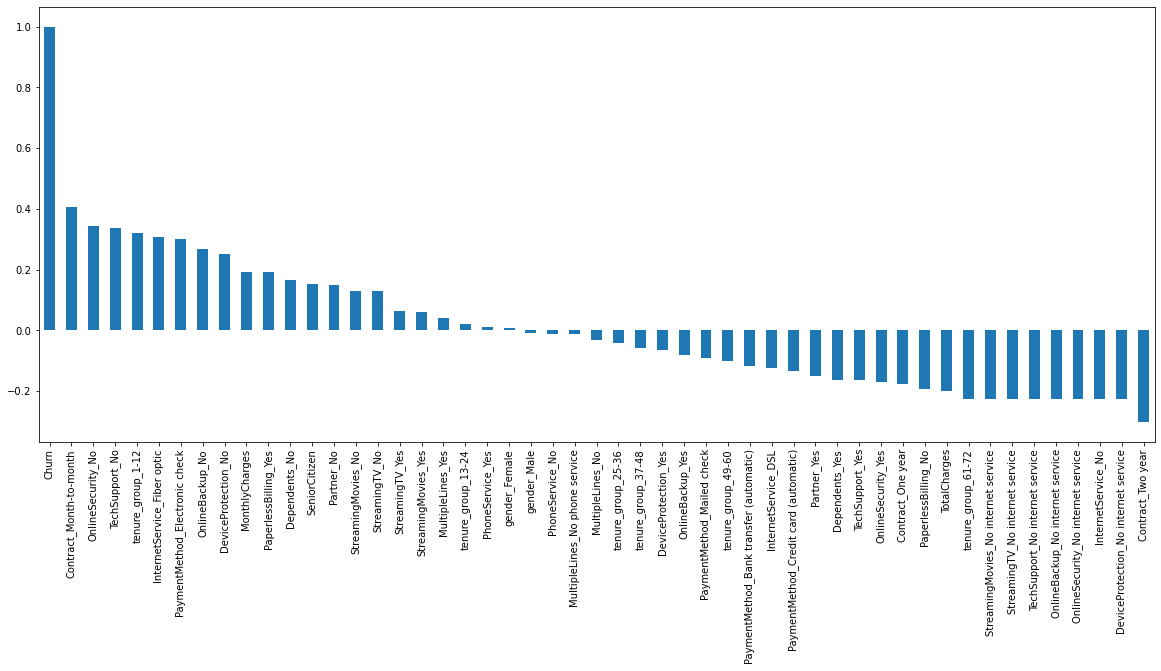

In [27]:
# correlation of all variables and Churn
plt.figure(figsize = (20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind ='bar')



## INSIGHT

+ High churners as seen in case of month to month contract,teanure group from 1-12 months, no technical support and no online security.

+ Low Churners as seen in case of long term contracts, Subscriptions without internet service.

+ Factors like Gender, phone service and multiple lines have almost no impact on churning  rate.